In [156]:
from collections import OrderedDict
import os
import re
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from plot_utils import basic_plot, collect_results, relevant_model_names

from eval import read_run_dir, get_model_from_run, eval_batch, eval_model, generate_eval_data

In [157]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
run_dir = "outputs"  # ton dossier outputs

# --- Lire toutes les runs ---
df_runs = read_run_dir(run_dir)
df_runs  # affiche les runs disponibles

,run_id,model,task,run_path
0,2025-09-01_15-04-29,transformer,matrix_factorization,outputs/matrix_factorization/2025-09-01_15-04-29
1,2025-09-06_13-08-09,transformer,sparse_recovery,outputs/sparse_recovery/2025-09-06_13-08-09


In [172]:
task = "sparse_recovery"
#task = "matrix_factorization"

run_id = "2025-09-06_13-08-09"

recompute_metrics = False

run_path = os.path.join(run_dir, task, run_id)
run_path

if recompute_metrics:
    get_run_metrics(run_path)

transformer 2025-09-06_13-08-09


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 24818.37it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


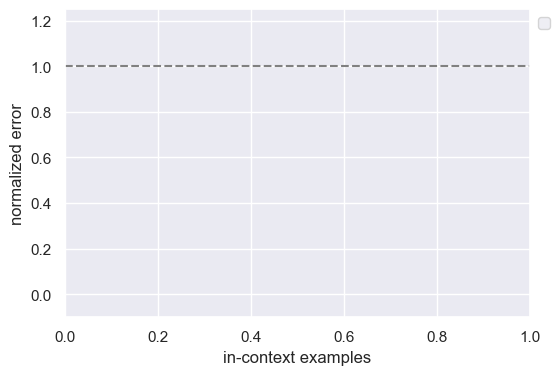

In [178]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df_runs, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf["model"]["n_dims"]

models = relevant_model_names[task]

basic_plot(metrics["default_eval"], models=models)
plt.show()